In [1]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [2]:
#function to make single euler step
def euler_step(f, xn, tn, delta_t):
    '''f is the right hand side of first order ODE x_dot = f 
       xn is the inital x value
       t is the timestep
       tn is initial t value'''
    xn = xn + f(xn, tn)*delta_t  #euler step
    return xn  #returning new x value

In [21]:
#function to do euler steps from t0 to tf
def solve_to(xn, tn, tf, delta_tmax,f, method):
    x = []
    t = []
    #euler or rk4
    if method in ('euler', 'Euler', 'e', 'E'):
        step_function = euler_step
    elif method in ('rk', 'RK', 'r', 'Runge-Kutta 4', 'RK4', 'runge-kutta4', 'rk4'):
        step_function = RK4_step
    
    #looping until x(tf) found
    while tn + delta_tmax < tf: 
        xn = step_function(f, xn, tn, delta_tmax)
        tn += delta_tmax
        x.append(xn)
        t.append(tn)
    else:         
        diff = 1 - tn
        newdelta_tmax = diff
        tn += diff
        xn = step_function(f, xn, tf, newdelta_tmax)
        x.append(xn)
        t.append(tn)
        return x, t
    

In [4]:
#creating function to solve ode using Euler's or RK-4
def solve_ode(f, x0, t0, tf, delta_t, method):
    estimation = solve_to(x0,t0,tf,delta_t,f, method)
    return(estimation)

In [5]:
#step function for Runge-Kuta 4th order
def RK4_step(f, xn, tn, delta_t): 
    k1 = delta_t*f(xn, tn) 
    k2 = delta_t*f(xn + 0.5 * k1 , tn + 0.5 * delta_t) 
    k3 = delta_t*f(xn + 0.5 * k2 , tn + 0.5 * delta_t) 
    k4 = delta_t*f(xn + k3, tn + delta_t) 
   
    xn = xn + (1.0/6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
    return (xn)

In [6]:
#creatinf main() function that can read user inputs in from command line and call solve_ode
def main():
    if __name__ == "__main__":
        #f =  float(input('What is your dx/dt?'))
        x0 = float(input('What is your initial x value?'))
        t0 = float(input('What is your initial t value?'))
        tf = float(input('What is your final t value?'))
        delta_t = float(input('What is your timestep?'))
        method = str(input('Would you like to use Euler method or Runge-Kutta 4?'))
        solve_ode(lambda x,t: x, x0, t0, tf, delta_t, method)

In [18]:
#function to create timestep error plot of ode method
def error_delta_t(deltat_values):
    errors_euler = [] 
    errors_rk4 = []
    #looping through delta_t values
    for delta_t in deltat_values: 
        (xe, te) = solve_ode(lambda x,t: x, 1, 0, 1, delta_t, 'euler')
        error_euler = (np.exp(te[-1]) - xe[-1])/np.exp(te[-1]) * 100   #
        errors_euler.append(error_euler)  #appending error array with every error
    for delta_t in deltat_values: 
        (x_rk4, t_rk4) = solve_ode(lambda x,t: x, 1, 0, 1, delta_t, 'rk4')
        error_rk4 = (np.exp(t_rk4[-1]) - x_rk4[-1])/np.exp(t_rk4[-1]) * 100   #
        errors_rk4.append(error_rk4)  #appending error array with every error
    return errors_euler, errors_rk4
    

In [8]:
def solve2nd_ode():
    """Generate numerical solution for x'' = -x

    Returns (t, x, v) ready for plotting.
    """
    #
    # The ODE and ICs give the initial value problem (IVP)
    #
    #   x'' = -x,  x(0) = 0, x'(0) = 1
    #
    # which has the unique solution
    #
    #   x = sin(t)
    #
    # To solve numerically we convert ODE to first order form as
    #
    #   x' = v
    #   v' = -x
    #
    # with the initial conditions
    #
    #   x(0) = 0
    #   v(0) = 1
    #
    # Now treating this as a vector ODE we have X = (x, v) and
    #
    #    (x, v)' = (v, -x)
    #
    # We need to make a function f that can compute the rhs from the vector
    # (x, v):
    #
    #   X' = f(X, t)

    def f_shm(X, t):
        x, v = X
        dxdt = v
        dvdt = -x
        dXdt = [dxdt, dvdt]
        return dXdt

    #
    # Initial conditions as a vector
    #
    x0 = 0
    v0 = 1
    X0 = [x0, v0]

    # Solve from t=0 to t=10 and get 200 equally spaced points in the output
    t = np.linspace(0, 10, 200)

    # Actually compute the solution: 
    X_solution = solve_ode(f_shm, X0, 0, 1, 0.3, 'e')

    # X_solution is a matrix with 200 rows and 2 columns. The first column is
    # x and the other is v.
    x_solution = X_solution[:, 0]
    v_solution = X_solution[:, 1]

    return t, x_solution, v_solution


def plot_solution(t, x, v):
    """Produce a figure with timeseries and phasespace plots"""

    # Create a figure with two plotting axes side by side:
    fig = plt.figure(figsize=(6, 3))
    ax1 = fig.add_axes([0.58, 0.15, 0.35, 0.7])
    ax2 = fig.add_axes([0.08, 0.15, 0.35, 0.7])

    # Timeseries plot
    ax1.set_title('Time series: $x, v$ against $t$')
    ax1.plot(t, x, color='green', linewidth=2, label=r'$x$')
    ax1.plot(t, v, color='blue', linewidth=2, label=r'$v$')
    ax1.set_yticks([-1, 0, 1])
    ax1.set_xlabel(r'$t$')
    ax1.set_xticks([0, np.pi, 2*np.pi, 3*np.pi])
    ax1.set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$'])
    ax1.grid()
    ax1.legend()

    # Phasespace plot
    ax2.set_title('Phase space: $v$ against $x$')
    ax2.plot(x, v, linewidth=2, color='red')
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$v$', rotation=0)
    ax2.set_xticks([-1, 0, 1])
    ax2.set_yticks([-1, 0, 1])
    ax2.grid()

    # Return the figure handle for showing/saving
    return fig


([1.3, 1.69, 2.197, 2.4167], [0.3, 0.6, 0.8999999999999999, 1.0])

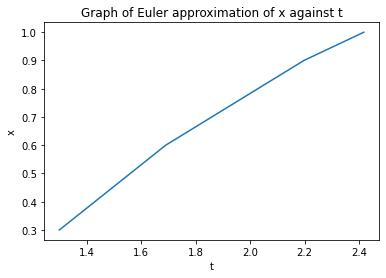

In [9]:
solve_ode(lambda x, t: x, 1, 0, 1, 0.3, 'euler')

In [10]:
x

NameError: name 'x' is not defined

In [11]:
t

NameError: name 't' is not defined

In [12]:
plt.plot(x, t)

NameError: name 'x' is not defined

In [24]:
t = np.arange(0.001, 1, 0.001)
(Euler_error, RK4_error) = error_delta_t(t)

In [ ]:
solve2nd_ode()

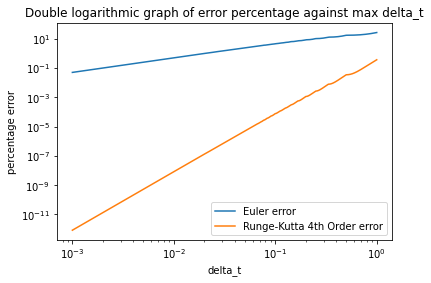

In [31]:
#plotting the double log graph of error against delta_t
plt.loglog(t, Euler_error, label = 'Euler error')
plt.loglog(t, RK4_error, label = 'Runge-Kutta 4th Order error')
plt.xlabel('delta_t')
plt.ylabel('percentage error')
plt.title('Double logarithmic graph of error percentage against max delta_t')
plt.legend(loc = 'best')
plt.show()